# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Dataset

In [2]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_sub = pd.read_csv("gender_submission.csv")

# Checking First 5 Rows of test and train Dataset

In [3]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_sub.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Shape of Dataset

In [6]:
df_test.shape

(418, 11)

In [7]:
df_train.shape

(891, 12)

# Checking Null values

In [8]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# missing value correction

In [11]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
df_train["Age"].median()

28.0

In [14]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].median())

In [15]:
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].mean())

In [16]:
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode())
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode())

# One Hot Encoder Concept

In [17]:
df_train = pd.get_dummies(df_train, columns = ['Sex'], prefix = 'Gender')
df_test = pd.get_dummies(df_test, columns = ['Sex'], prefix = 'Gender')

In [18]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'emb')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'emb')

In [20]:
df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Gender_female,Gender_male,emb_C,emb_Q,emb_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,1,0,0


In [21]:
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Visualization

In [22]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

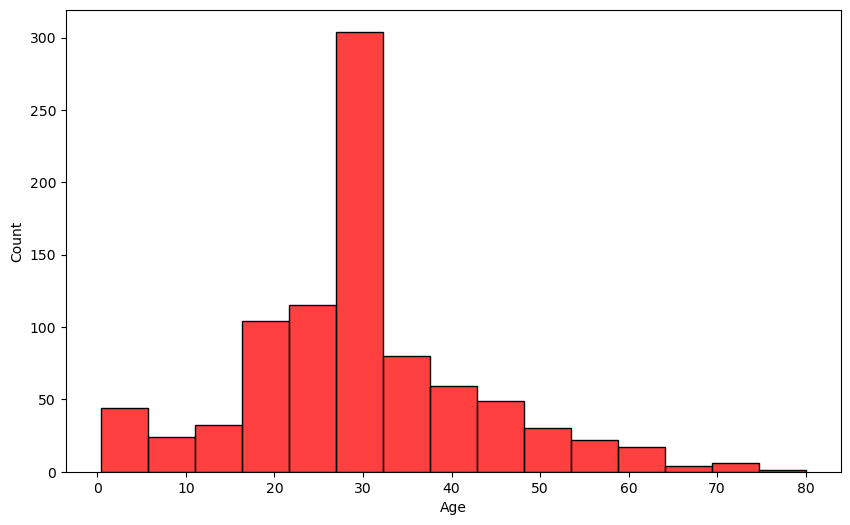

In [23]:
plt.figure(figsize = (10, 6))
sns.histplot(df_train['Age'], bins = 15, color = 'red')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


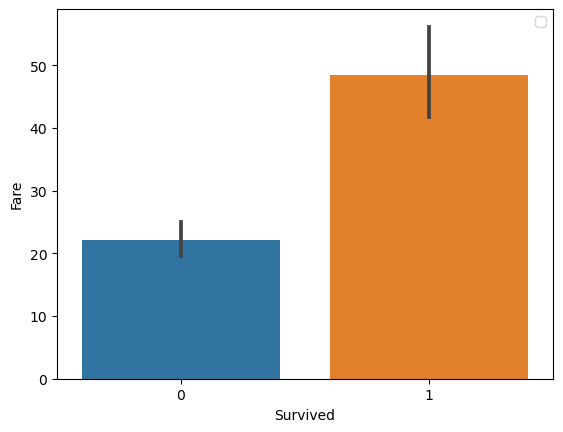

In [24]:
sns.barplot(x = 'Survived', y = 'Fare',data = df_train)
plt.legend()

In [25]:
df_train.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Gender_female      uint8
Gender_male        uint8
emb_C              uint8
emb_Q              uint8
emb_S              uint8
dtype: object

In [26]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Gender_female', 'Gender_male', 'emb_C',
       'emb_Q', 'emb_S'],
      dtype='object')

C:\Users\arshi\AppData\Local\Temp\ipykernel_18952\2264050998.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


<Axes: >

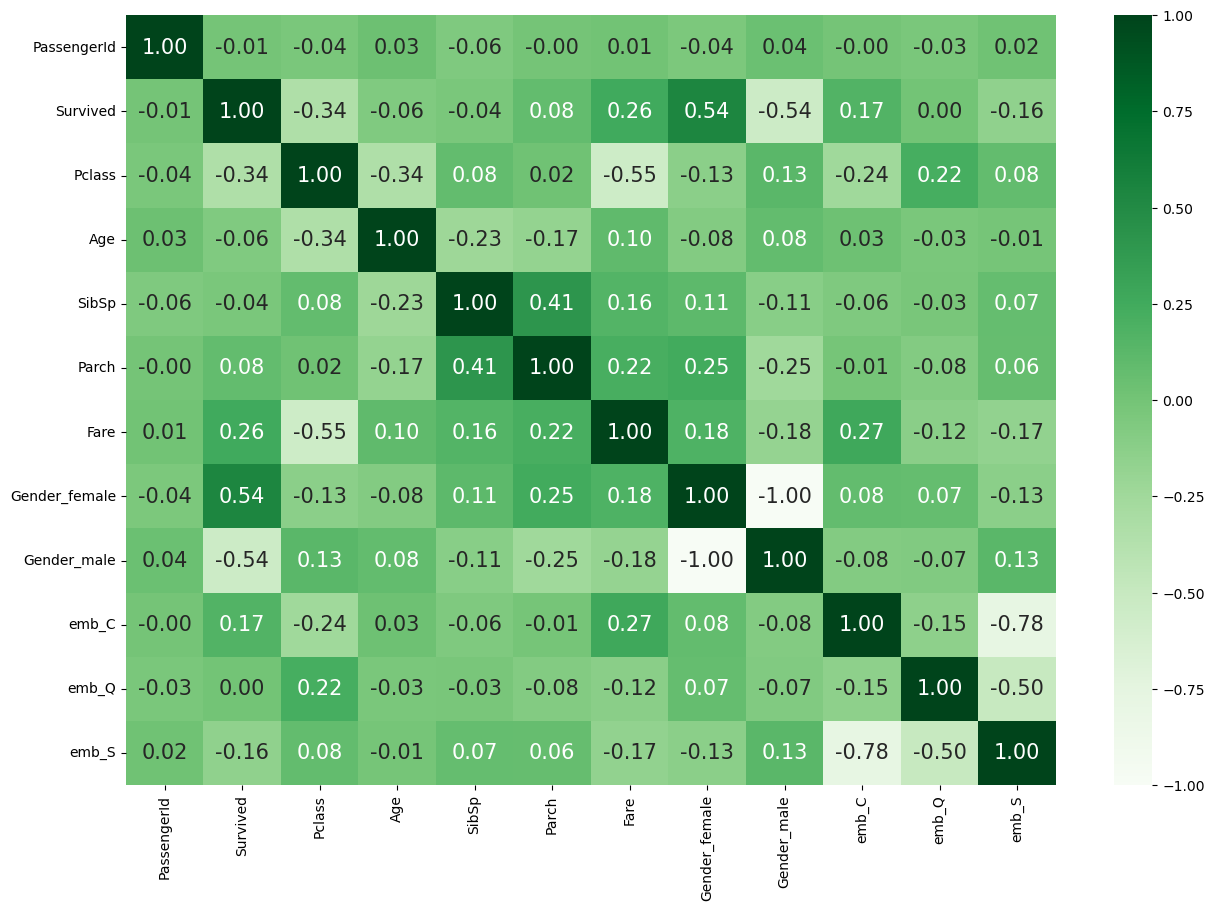

In [27]:
corr = df_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

# Train/Test split

In [28]:
X = df_train[['Pclass', 'Age', 'Gender_female', 'Gender_male']]
y = df_train["Survived"]

In [29]:
X

,Pclass,Age,Gender_female,Gender_male
0,3,22.0,0,1
1,1,38.0,1,0
2,3,26.0,1,0
3,1,35.0,1,0
4,3,35.0,0,1
...,...,...,...,...
886,2,27.0,0,1
887,1,19.0,1,0
888,3,28.0,1,0
889,1,26.0,0,1


# K-Nearest Neighbors And Accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
kn = KNeighborsClassifier()
kn.fit(X_train , y_train)
y_pred1 = kn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred1)
ac=accuracy_score(y_test,y_pred1)

In [ ]:
print("Confusion Matrix of K_nearest =", cm)
print("Accuracy =",ac)

# Naive Bayes And Accuracy

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred2 = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred2)
ac=accuracy_score(y_test,y_pred2)

In [ ]:
print("Confusion Matrix of K_nearest =", cm)
print("Accuracy =",ac)